## 실습1. File Upload(Local/Web)

In [1]:
# 사용 패키지 불러오기
import pandas as pd # 판다스
from sklearn.model_selection import train_test_split # 훈련/테스트 세트 분리
from sklearn.preprocessing import StandardScaler # 표준화
from sklearn.tree import DecisionTreeClassifier # DT
from sklearn.ensemble import RandomForestClassifier # RF
from sklearn.svm import SVC # SVM
from sklearn.linear_model import LogisticRegression # LR
from sklearn.metrics import accuracy_score # 정확도

In [10]:
import pandas as pd
import requests
from io import BytesIO

# GitHub의 Raw XLSX URL
url = "https://raw.githubusercontent.com/MyungKyuYi/AI-class/main/combined_dataset-1.xlsx"

# 파일 요청
response = requests.get(url)
response.raise_for_status()  # HTTP 에러 발생 시 예외 처리

# BytesIO를 사용하여 Excel 파일을 pandas로 읽기
df = pd.read_excel(BytesIO(response.content), engine="openpyxl")

In [9]:
df.head()

,Num.,subject_ID,Sex(M/F),Age(year),Height(cm),Weight(kg),Systolic Blood Pressure(mmHg),Diastolic Blood Pressure(mmHg),Heart Rate(b/m),BMI(kg/m^2),...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,1,2,Female,45,152,63,161,89,97,27.268006,...,1766,1766,1766,1833,1833,1827,1827,1827,1754,1754
1,1,2,Female,45,152,63,161,89,97,27.268006,...,1985,1985,2026,2026,2026,1977,1977,1997,1997,1997
2,1,2,Female,45,152,63,161,89,97,27.268006,...,1942,1900,1900,1938,1938,1938,1924,1924,1929,1929
3,2,3,Female,50,157,50,160,93,76,20.284799,...,2073,2072,2072,2072,2051,2051,2036,2036,2036,2045
4,2,3,Female,50,157,50,160,93,76,20.284799,...,2021,2010,2010,2010,2001,2001,2003,2003,2003,1989


## 실습2. knn 알고리즘

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.datasets import load_iris
import seaborn as sns

In [17]:
file_path = "C:/Users/samsung-user/OneDrive/바탕 화면/인공지능개론/1주차/iris.csv" 
iris = pd.read_csv(file_path)
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [19]:
# X, y 설정
X = iris.drop(columns=['Name'])  # 타겟 변수 : 'species' (클래스 레이블)
y = iris['Name']

In [20]:
# train, test 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [22]:
# 표준화
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [28]:
# K-NN 모델 학습 (k=5)
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=7)

In [29]:
# 예측 및 평가
y_pred = knn.predict(X_test_scaled)

In [30]:
# 정확도 출력
accuracy = accuracy_score(y_test, y_pred)
print(f"모델 정확도: {accuracy:.4f}")

모델 정확도: 0.9667


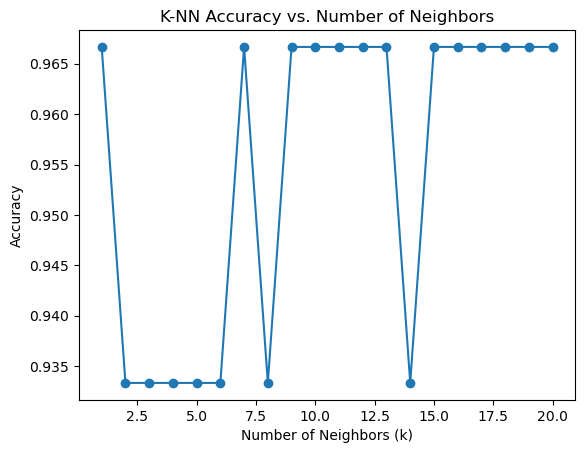

In [27]:
# 최적의 k 찾기
k_values = range(1, 21)
accuracy_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

plt.plot(k_values, accuracy_scores, marker="o")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.title("K-NN Accuracy vs. Number of Neighbors")
plt.show()

## 실습3. 당뇨병 데이터 분류(DT, RF, SVM, LR, KNN)

In [39]:
url = 'https://raw.githubusercontent.com/MyungKyuYi/AI-class/main/diabetes.csv'
dia = pd.read_csv(url)

In [40]:
dia.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [58]:
# 컬럼명 확인
dia.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [57]:
dia['Outcome'].value_counts() # 레이블 개수 확인

Outcome
0    500
1    268
Name: count, dtype: int64

In [56]:
dia.isnull().sum() # 결측치 확인

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [51]:
# 훈련 세트 & 테스트 세트 분할 (8:2)
X = dia.drop(columns=['Outcome'])  # 타겟 변수 : 'Outcome' (클래스 레이블)
y = dia['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [45]:
# 표준화
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [54]:
# 모델 : 의사결정나무(DT), 랜덤포레스트(RF), 서포트벡터머신(SVM), 로지스틱선형회귀(LR), K-최근접이웃(KNN)
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='linear', random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=200, random_state=42),
    "KNN" : KNeighborsClassifier(n_neighbors=6)
}

In [55]:
# 모델 학습 및 평가
for name, model in models.items():
    if name in ["SVM", "Logistic Regression", "KNN"]:  
        model.fit(X_train_scaled, y_train)  # 🔹 SVM, LR은 표준화 데이터 사용
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)  # 🔹 DT, RF는 원본 데이터 사용
        y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.4f}")

Decision Tree Accuracy: 0.7273
Random Forest Accuracy: 0.7597
SVM Accuracy: 0.7208
Logistic Regression Accuracy: 0.7143
KNN Accuracy: 0.7403


In [ ]:
# 5개 모델 모두 정확도가 70%대로 그리 높지 않은 것으로 나타남.

## 실습4. 타이타닉 데이터 전처리

In [64]:
url2 = "https://raw.githubusercontent.com/MyungKyuYi/AI-class/main/titanic.csv"
tit = pd.read_csv(url2)

In [72]:
# 첫 5행 출력
tit.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [73]:
# 변수명 확인
tit.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [71]:
# 레이블 개수 확인
tit['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [66]:
# 결측치 확인
tit.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [77]:
# 원-핫인코딩
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder() # LabelEncoder 객체 생성
tit["Sex"] = encoder.fit_transform(tit["Sex"]) # "Sex" 변수를 숫자로 변환
print(tit[["Sex"]].head())

   Sex
0    1
1    0
2    0
3    0
4    1


In [86]:
# 결측치 처리
tit["Age"].fillna(tit["Age"].mean, inplace=True)

In [87]:
# 불필요한 행 삭제
titan = tit.drop(["Name", "Cabin", "Embarked","Ticket"], axis=1)

In [88]:
titan.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,1,22.0,1,0,7.2500
1,2,1,1,0,38.0,1,0,71.2833
2,3,1,3,0,26.0,0,0,7.9250
3,4,1,1,0,35.0,1,0,53.1000
4,5,0,3,1,35.0,0,0,8.0500


In [89]:
titan.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64